In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os 
import time

In [2]:
imgdict = dict()
file1 = "CUB_200_2011/CUB_200_2011/images.txt"
with open(file1) as f:
    for row in f:
        idx, direct = row.split(" ")
        _, img = direct.split("/")
        imgdict[img[:-1]] = idx

In [3]:
imgdict

{'Black_Footed_Albatross_0046_18.jpg': '1',
 'Black_Footed_Albatross_0009_34.jpg': '2',
 'Black_Footed_Albatross_0002_55.jpg': '3',
 'Black_Footed_Albatross_0074_59.jpg': '4',
 'Black_Footed_Albatross_0014_89.jpg': '5',
 'Black_Footed_Albatross_0085_92.jpg': '6',
 'Black_Footed_Albatross_0031_100.jpg': '7',
 'Black_Footed_Albatross_0051_796103.jpg': '8',
 'Black_Footed_Albatross_0010_796097.jpg': '9',
 'Black_Footed_Albatross_0025_796057.jpg': '10',
 'Black_Footed_Albatross_0023_796059.jpg': '11',
 'Black_Footed_Albatross_0086_796062.jpg': '12',
 'Black_Footed_Albatross_0049_796063.jpg': '13',
 'Black_Footed_Albatross_0006_796065.jpg': '14',
 'Black_Footed_Albatross_0040_796066.jpg': '15',
 'Black_Footed_Albatross_0016_796067.jpg': '16',
 'Black_Footed_Albatross_0065_796068.jpg': '17',
 'Black_Footed_Albatross_0089_796069.jpg': '18',
 'Black_Footed_Albatross_0042_796071.jpg': '19',
 'Black_Footed_Albatross_0067_170.jpg': '20',
 'Black_Footed_Albatross_0060_796076.jpg': '21',
 'Black_Fo

In [4]:
bboxdict = dict()
file2 = "CUB_200_2011/CUB_200_2011/bounding_boxes.txt"
with open(file2) as f:
    for row in f:
        idx, x0, x1, y0, y1 = row.split(" ")
        temp = np.array([int(float(x0)), int(float(x1)), int(float(y0)), int(float(y1))])
        bboxdict[idx] = temp

In [5]:
bboxdict

{'1': array([ 60,  27, 325, 304]),
 '2': array([139,  30, 153, 264]),
 '3': array([ 14, 112, 388, 186]),
 '4': array([112,  90, 255, 242]),
 '5': array([ 70,  50, 134, 303]),
 '6': array([ 33,  53, 251, 395]),
 '7': array([  7,  75, 420, 262]),
 '8': array([ 78,  86, 333, 158]),
 '9': array([112,  76, 221, 189]),
 '10': array([ 27,   4, 199, 201]),
 '11': array([  1,  52, 342, 260]),
 '12': array([ 47,  21, 179, 249]),
 '13': array([ 36,  32, 197, 457]),
 '14': array([ 37,  40, 262, 184]),
 '15': array([ 23,  80, 395, 237]),
 '16': array([141,  87, 256, 211]),
 '17': array([ 40,  38, 254, 209]),
 '18': array([ 45,  58, 254, 249]),
 '19': array([135,  83, 304, 181]),
 '20': array([ 23, 195, 255, 122]),
 '21': array([ 11,  77, 281, 139]),
 '22': array([  5,   4, 210, 130]),
 '23': array([154,  93, 188, 165]),
 '24': array([ 50,  25, 156, 139]),
 '25': array([172, 106, 265, 214]),
 '26': array([ 37,  61, 409, 180]),
 '27': array([ 65,  62, 309, 345]),
 '28': array([  1,   2, 499, 286]),
 

In [7]:
cv_img = cv2.imread("Western_Grebe_0044_36188.jpg")
color = (np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256))
bbox = bboxdict[imgdict["Western_Grebe_0044_36188.jpg"]]
cv_img = cv2.rectangle(cv_img, (bbox[0],bbox[1]), (bbox[2],bbox[3]), color, 2)
cv2.imwrite("test.png", cv_img)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

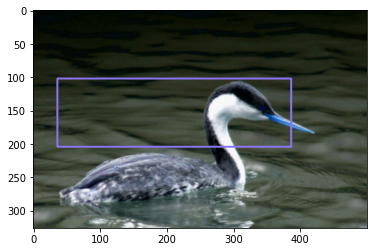

In [8]:
im = cv2.imread("test.png")
#im.shape
plt.imshow(im)

In [6]:
directory = "CUBtest"
idx = 0
for filename in os.listdir(directory):
    img = "oheat_" + str(idx) + ".png"
    cv_img = cv2.imread(img)
    color = (np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256))
    bbox = bboxdict[imgdict[str(filename)]]
    im2 = cv2.imread(directory + "/" + filename)
    cv_img = cv2.rectangle(cv_img, (int(bbox[0]),int(bbox[1])), (int(bbox[2]),int(bbox[3])), color, 2)
    cv2.imwrite("new_yolo_bbox_heat_" + str(idx) + ".png", cv_img)
    idx += 1

In [8]:
directory = "CUBtest"
idx = 0
for filename in os.listdir(directory):
    print(filename)

Blue_Jay_0013_61463.jpg
Bobolink_0014_11055.jpg
Brandt_Cormorant_0006_22925.jpg
Clark_Nutcracker_0017_84777.jpg
Ivory_Gull_0015_49199.jpg
Sooty_Albatross_0005_796342.jpg
Western_Grebe_0044_36188.jpg
White_Breasted_Kingfisher_0022_73459.jpg
Yellow_Bellied_Flycatcher_0025_795484.jpg
Yellow_Billed_Cuckoo_0006_26578.jpg


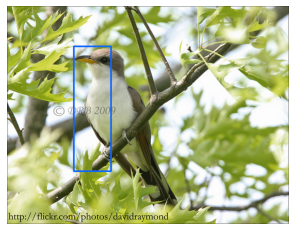

In [25]:
plt.axis("off")
plt.imshow(cv_img)
#plt.savefig("bbox_heat_0", bbox_inches='tight')

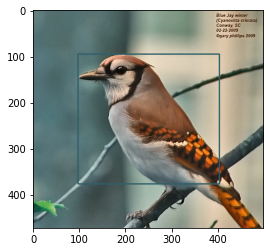

In [11]:
plt.imshow(cv_img)

In [5]:
BATCH_SIZE = 4
IMG_SIZE = (160, 160)

train_dir = "CUB_200_2011/CUB_200_2011/images"

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             validation_split=0.2,
                                             subset="training",
                                             seed=42,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)
test_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             validation_split=0.2,
                                             subset="validation",
                                             seed=42,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 11788 files belonging to 200 classes.
Using 9431 files for training.
Found 11788 files belonging to 200 classes.
Using 2357 files for validation.


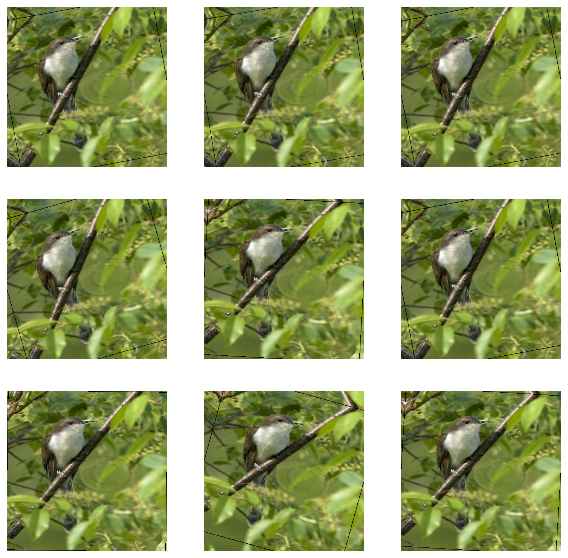

In [6]:
data_augmentation = tf.keras.Sequential([
  #tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.05),
])
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

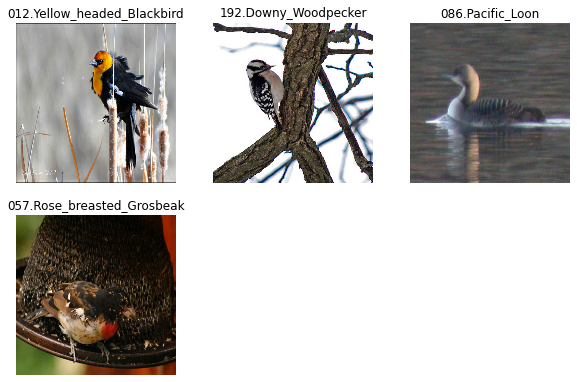

In [7]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(4):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(4, 5, 5, 512)


In [9]:
#base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [10]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=True)
x = Flatten()(x)
x = Dense(units=4096,activation="relu")(x)
x = Dense(units=4096,activation="relu")(x)
outputs = Dense(units=200)(x)
model = tf.keras.Model(inputs, outputs)

In [11]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)             

In [9]:
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        self.model.reset_metrics()

batch_stats_callback = CollectBatchStats()

In [ ]:
hist = model.fit(train_dataset, epochs=50) #callbacks=[batch_stats_callback]
model.save('birds1.h5') 

Epoch 1/50
2358/2358 [==============================] - 366s 155ms/step - loss: 5.3146 - accuracy: 0.0049
Epoch 2/50
2358/2358 [==============================] - 341s 145ms/step - loss: 5.3065 - accuracy: 0.0051
Epoch 3/50
2358/2358 [==============================] - 337s 143ms/step - loss: 5.2982 - accuracy: 0.0053
Epoch 4/50
  91/2358 [>.............................] - ETA: 5:17 - loss: 5.2941 - accuracy: 0.0082

In [10]:
np.save('VGG.npy',model.weights)

In [11]:
model.weights[0].name

'block1_conv1/kernel:0'

In [11]:
data_dict2 = np.load('VGG.npy', encoding='latin1', allow_pickle=True)

In [12]:
#for i in (data_dict2):
#    print(i)
a = list(data_dict2)
a[6]
#a[1].numpy()

<tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32, numpy=
array([[[[-2.30123661e-03, -5.89181297e-03,  3.96523578e-03, ...,
           8.69934738e-04,  4.31257114e-03,  2.39815353e-03],
         [ 6.93455897e-03,  1.77669781e-03,  1.87194608e-02, ...,
          -3.17397565e-02, -4.21442185e-03, -1.76308881e-02],
         [-1.27900802e-02, -6.50780788e-03, -4.10286430e-03, ...,
           2.31482647e-03, -4.67822663e-02, -3.75668402e-03],
         ...,
         [-4.75286070e-04, -2.96283532e-02,  3.03538516e-02, ...,
           1.51648500e-03, -2.71695852e-02, -1.84430566e-03],
         [ 1.41743217e-02, -3.64480889e-04, -2.33754283e-03, ...,
          -2.28237733e-02, -1.60014853e-02,  2.46631019e-02],
         [ 1.18608214e-02, -2.77200472e-02, -2.48606838e-02, ...,
           4.10957001e-02,  5.57063818e-02, -2.19316985e-02]],

        [[-1.38294604e-03, -5.54690696e-03, -1.06138433e-03, ...,
           1.82250992e-03, -3.59015947e-04,  9.99924168e-03],
      

In [13]:
my_dict = {}
for var1, var2 in zip(*[iter(a)]*2):
    name = var1.name
    bc, _ = name.split("/")
    b = []
    b.append(var1.numpy())
    b.append(var2.numpy())
    my_dict[bc] = b

In [14]:
np.save('newVGG.npy', my_dict)

In [15]:
import numpy as np 
new_data_dict = np.load('newVGG.npy', encoding='latin1', allow_pickle=True).item()
for key,_ in enumerate(new_data_dict):
    print(_)

block1_conv1
block1_conv2
block2_conv1
block2_conv2
block3_conv1
block3_conv2
block3_conv3
block4_conv1
block4_conv2
block4_conv3
block5_conv1
block5_conv2
block5_conv3
dense
dense_1
dense_2


In [23]:
data_dict = np.load('vgg16.npy', encoding='latin1', allow_pickle=True).item()

In [41]:
len(data_dict)

16

In [10]:
#print(data_dict)
for name,_ in enumerate(data_dict):
    print(_)

conv5_1
fc6
conv5_3
conv5_2
fc8
fc7
conv4_1
conv4_2
conv4_3
conv3_3
conv3_2
conv3_1
conv1_1
conv1_2
conv2_2
conv2_1
